<a href="https://colab.research.google.com/github/dhanunjaireddy07/CreditCard-Fraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [48]:
df=pd.read_csv('creditcard.csv')

In [49]:
df.shape

(284807, 31)

In [50]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
df.shape

(284807, 31)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
df=df.dropna()

In [54]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [55]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [57]:
X_train.shape

(227845, 30)

In [58]:
X_test.shape

(56962, 30)

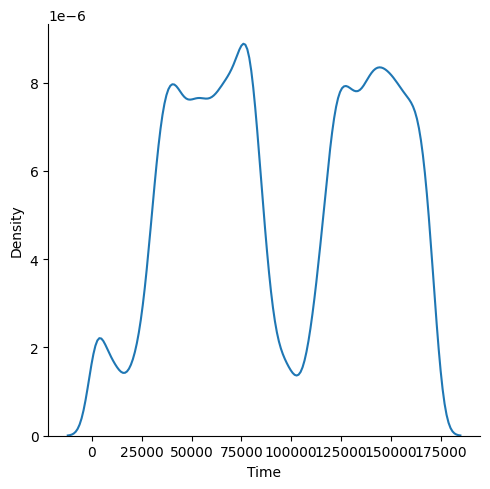

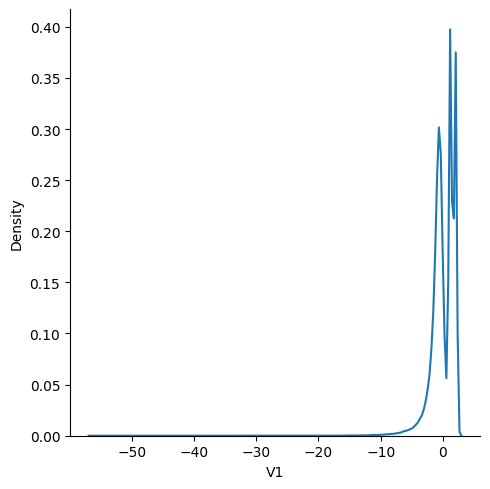

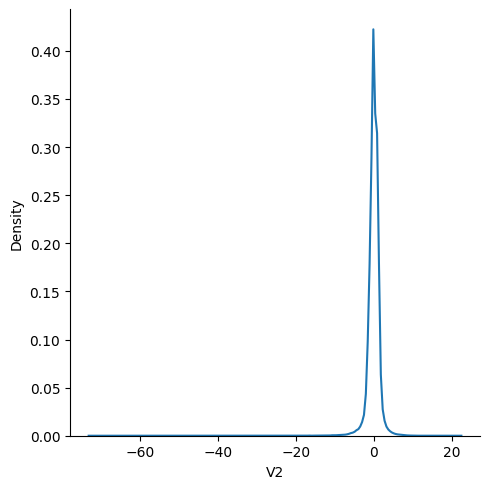

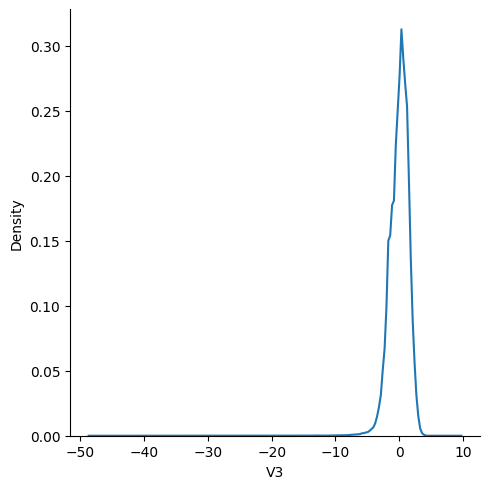

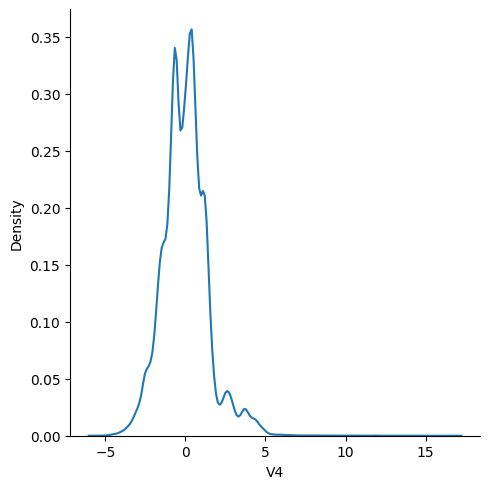

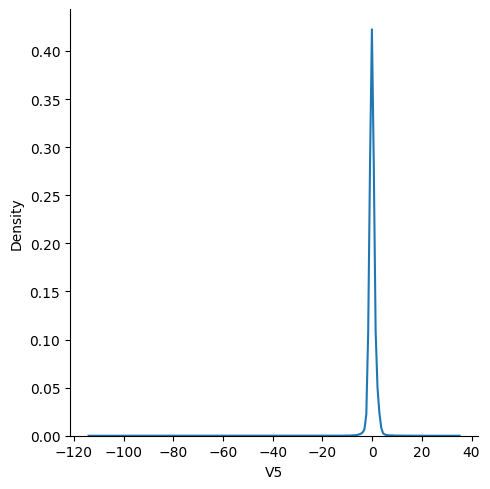

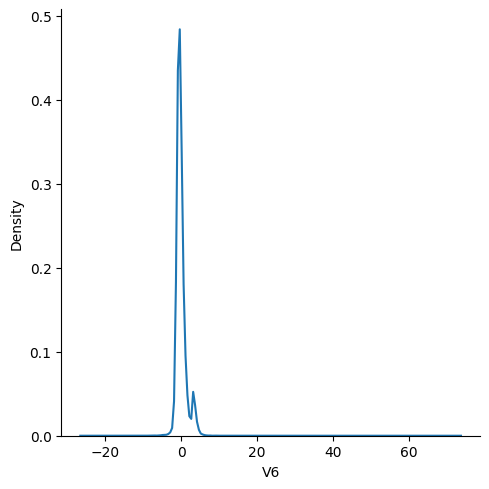

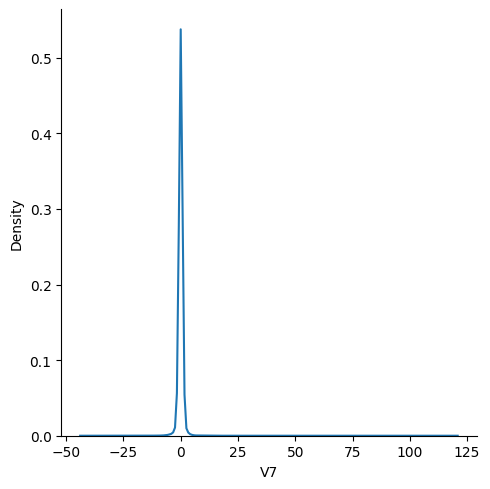

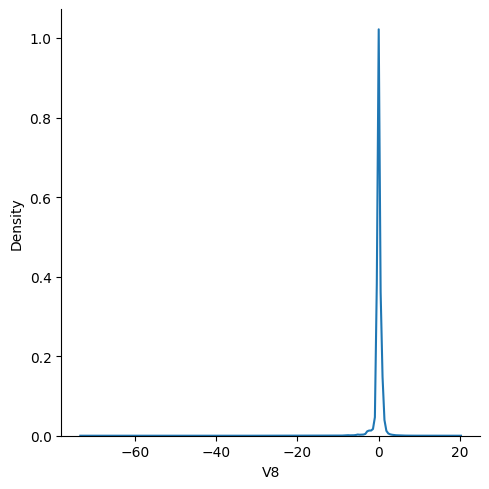

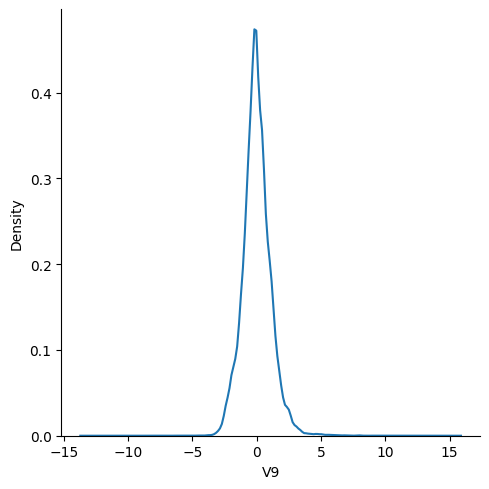

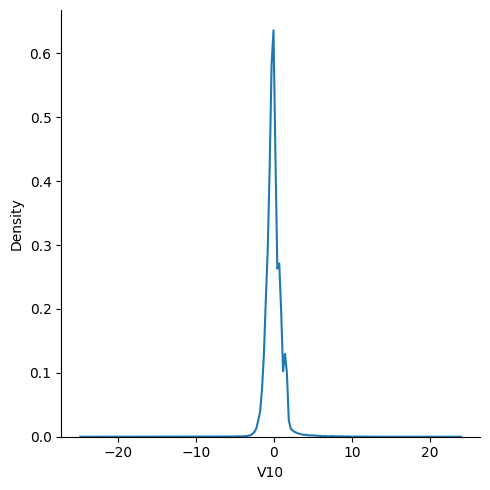

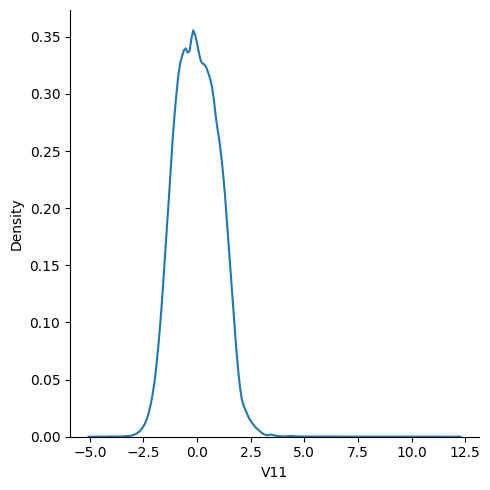

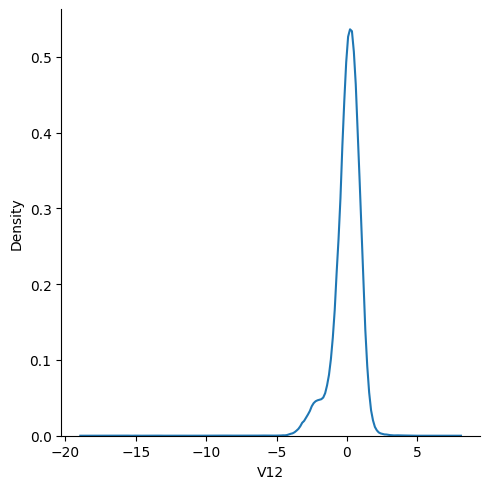

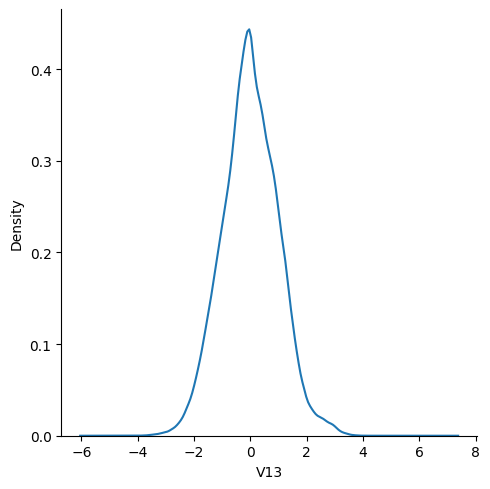

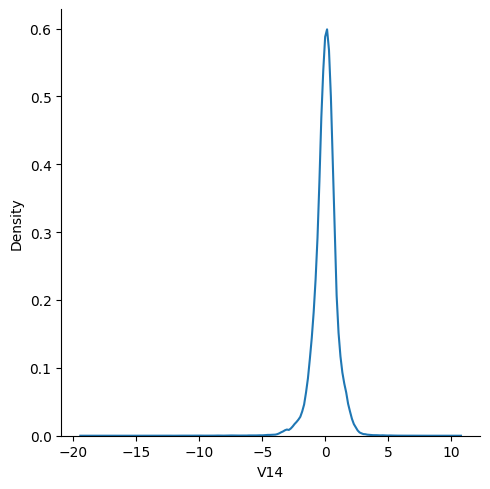

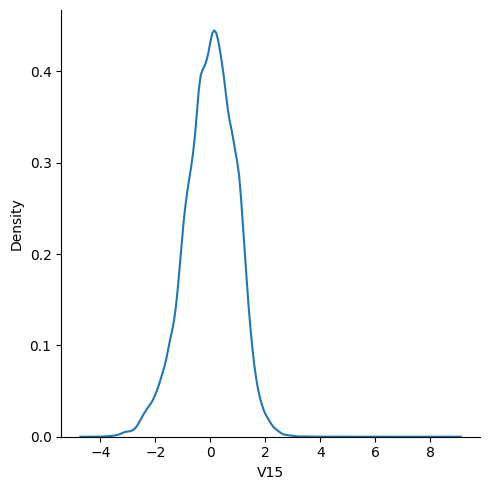

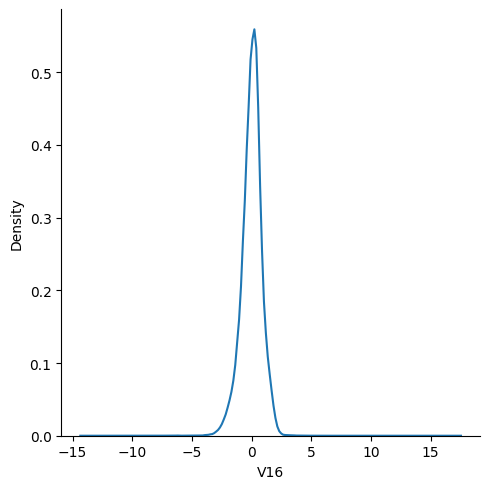

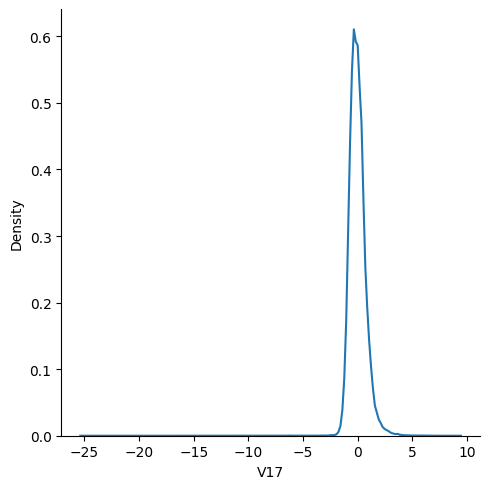

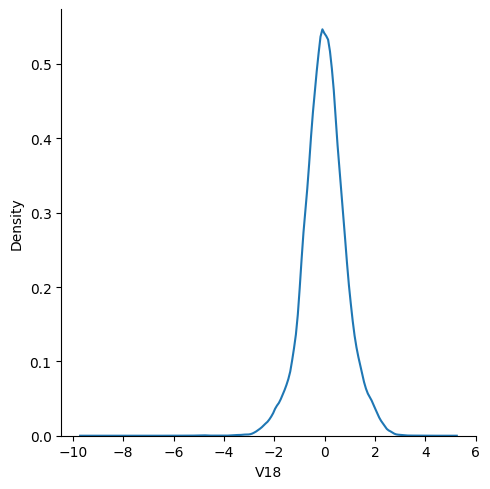

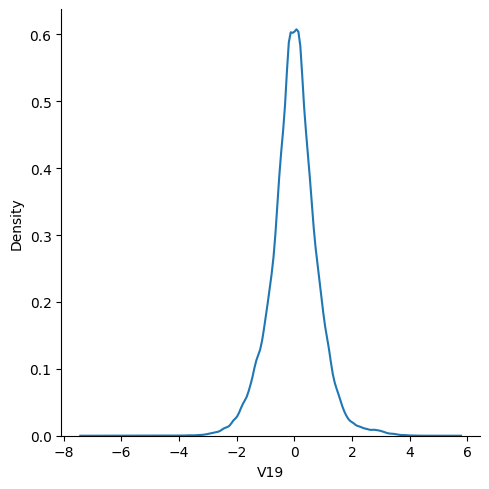

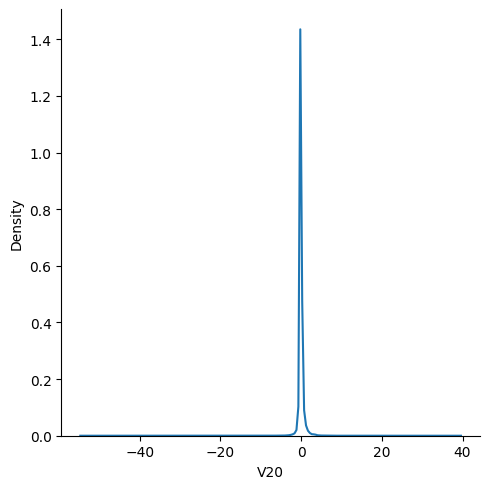

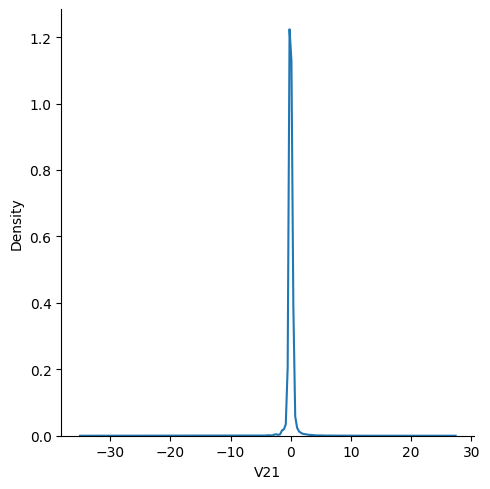

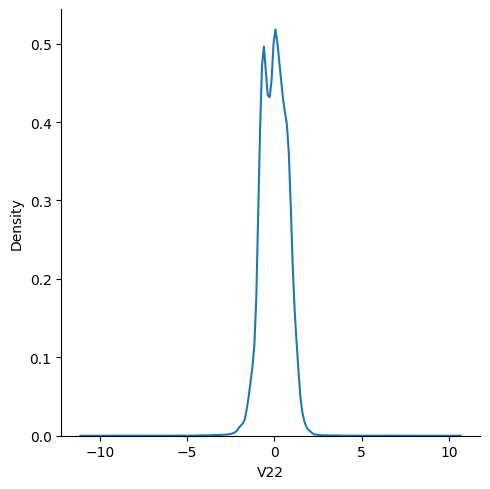

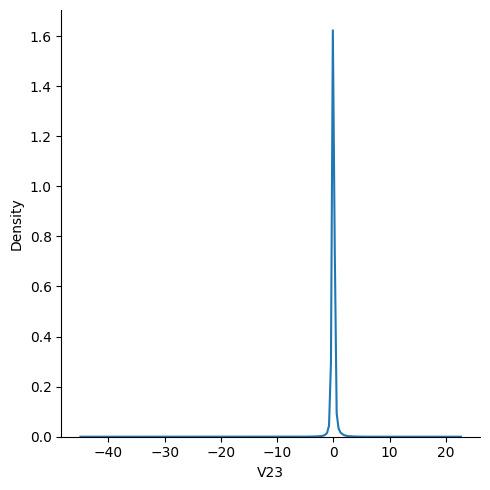

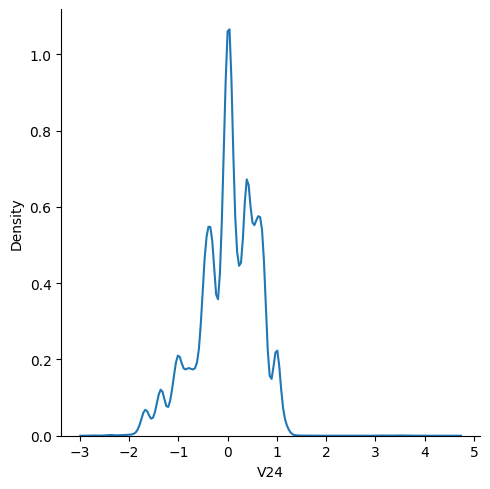

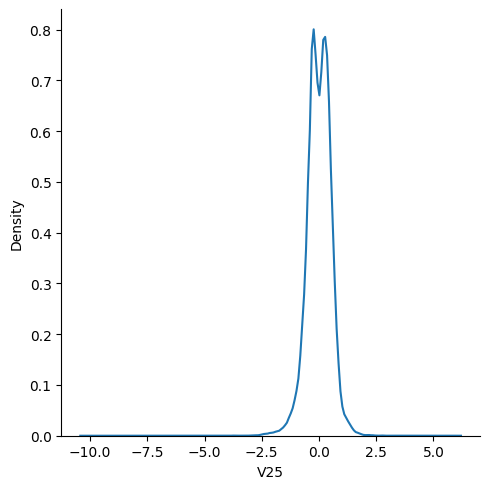

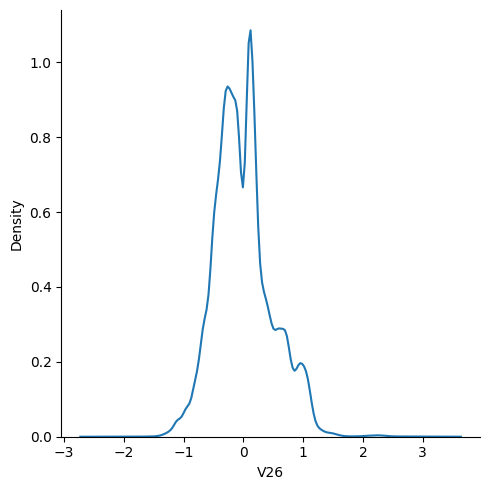

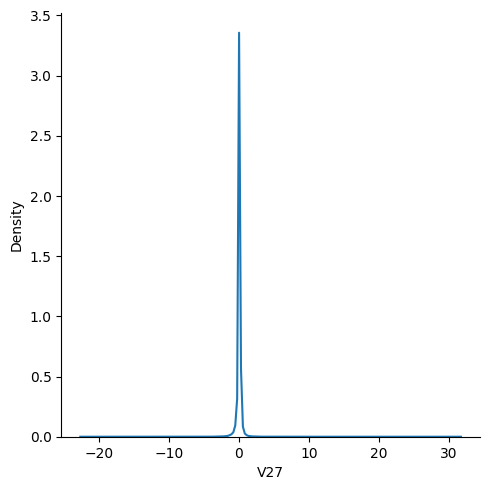

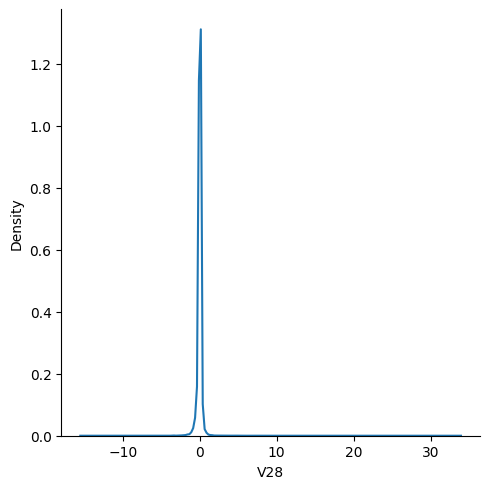

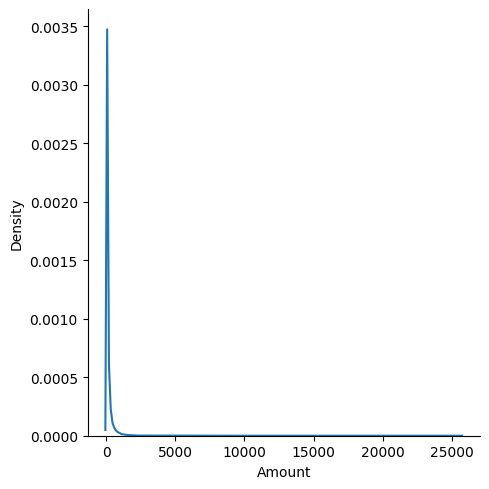

In [59]:
for i in X_train.columns:
  sns.displot(X_train[i],kind='kde')


In [60]:
def fun(data_c,var):
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind='kde')
  plt.subplot(1,3,2)
  sns.boxplot(x=data_c[var])
  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist='norm',plot=plt)
  plt.show()

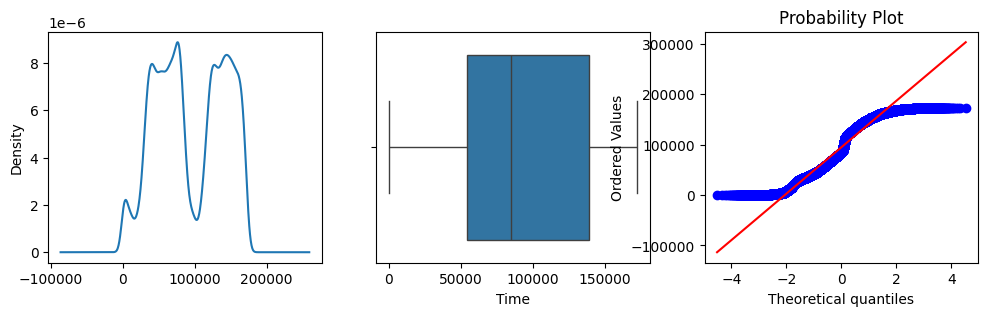

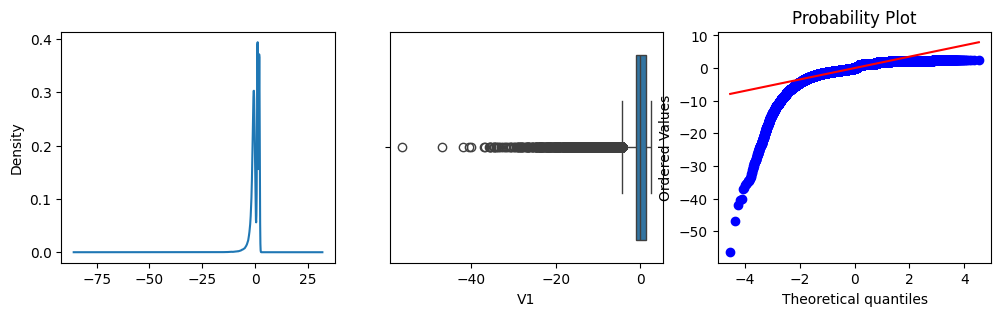

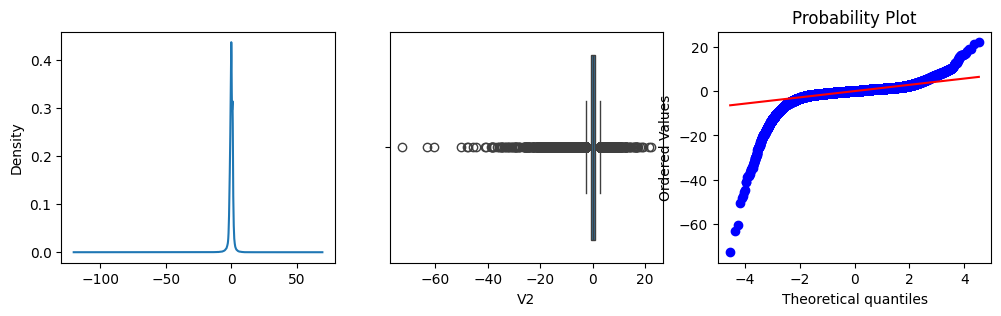

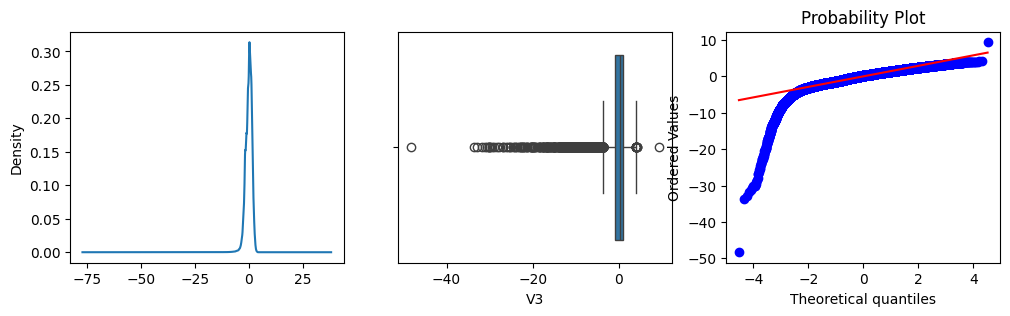

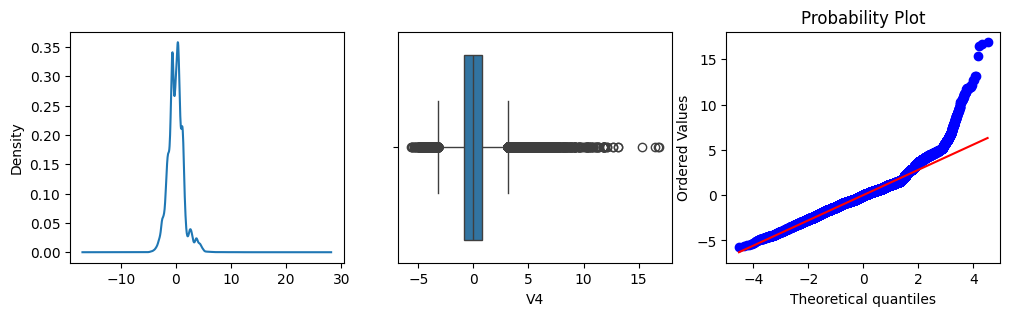

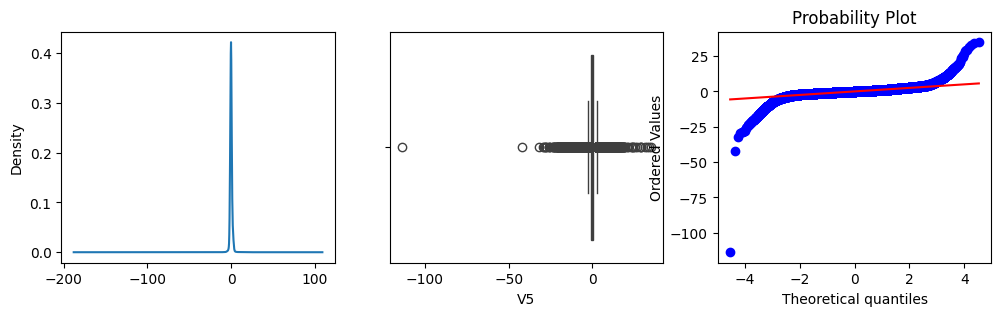

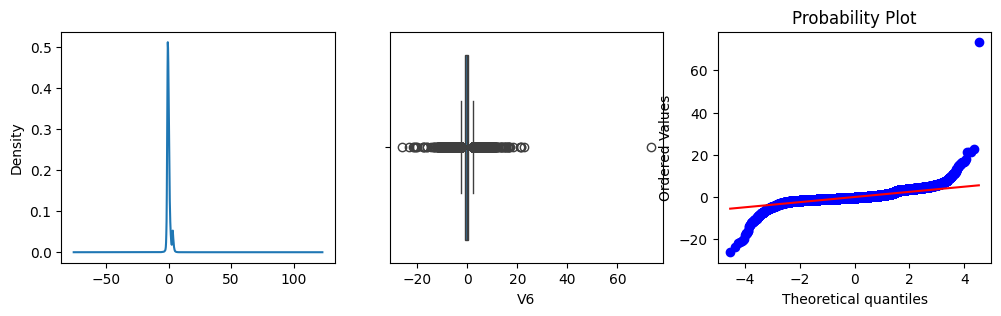

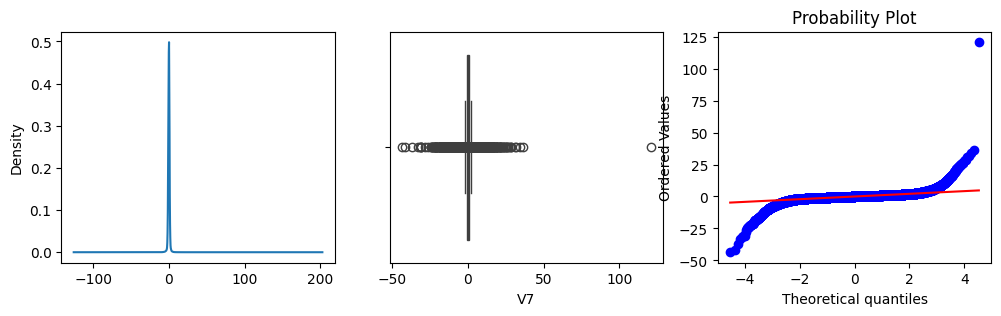

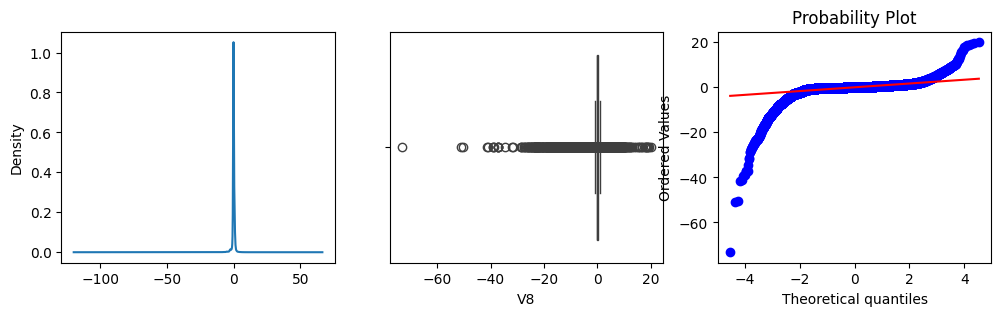

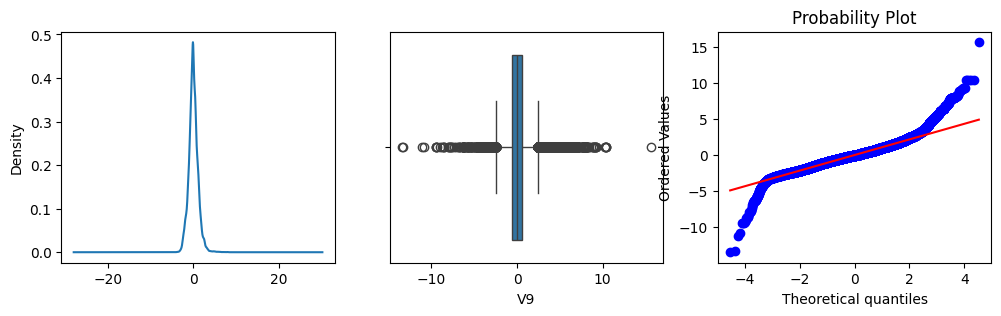

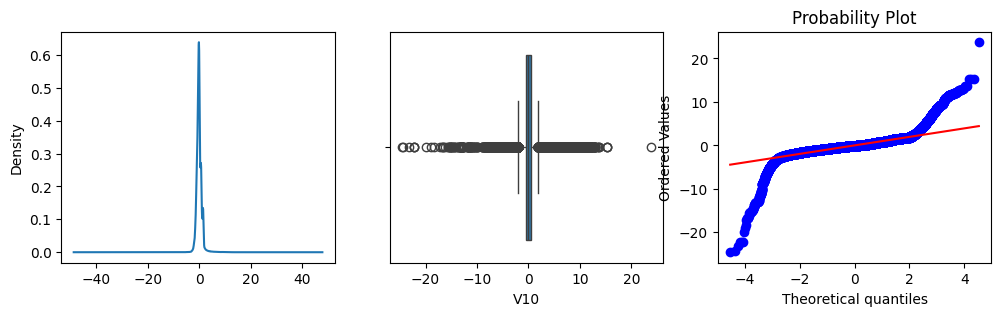

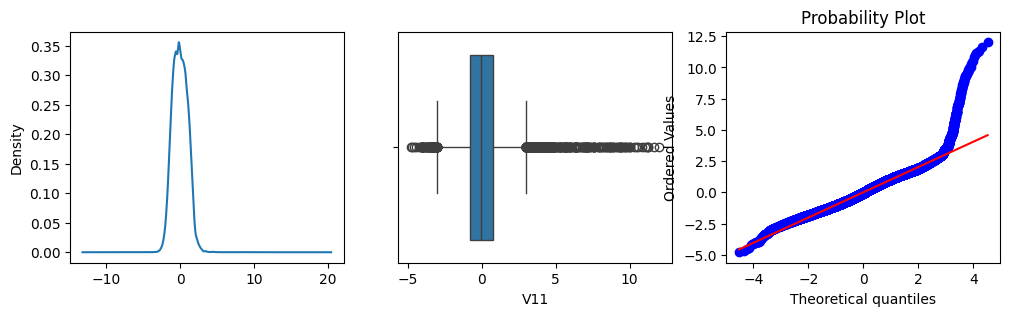

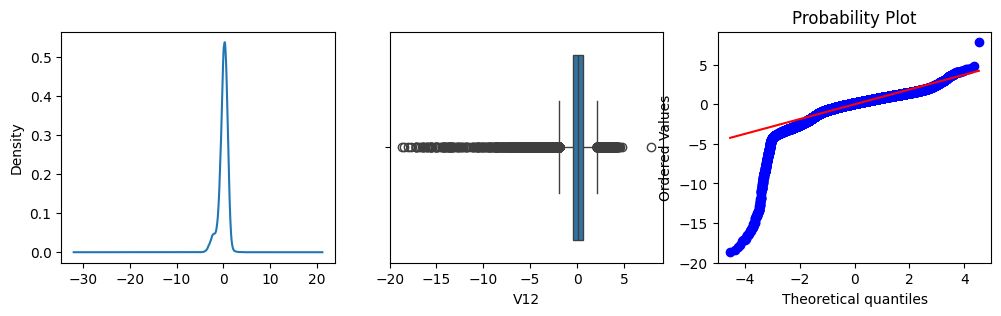

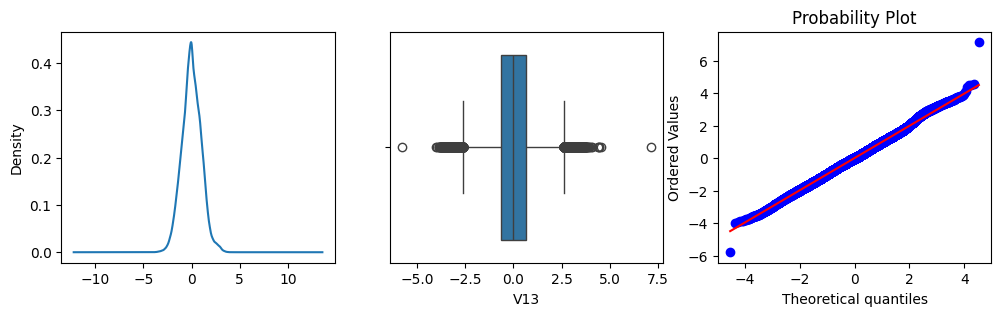

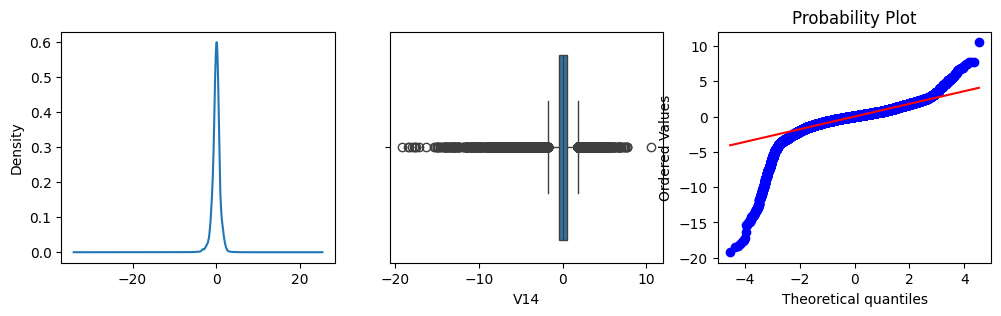

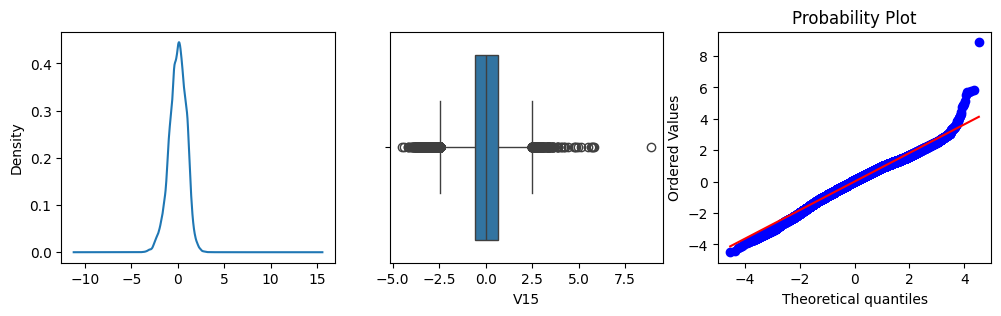

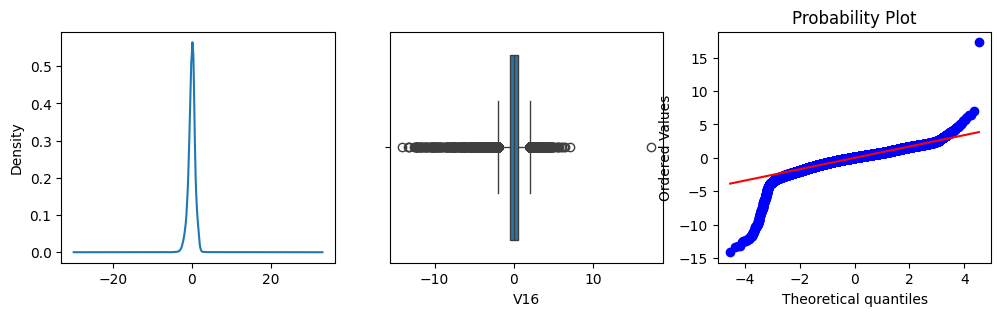

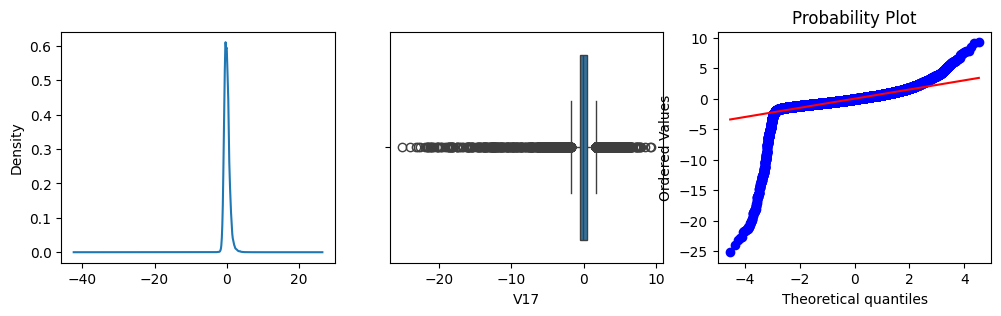

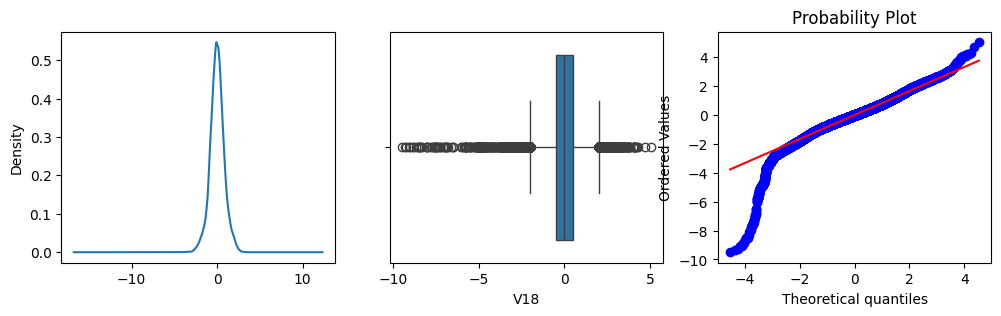

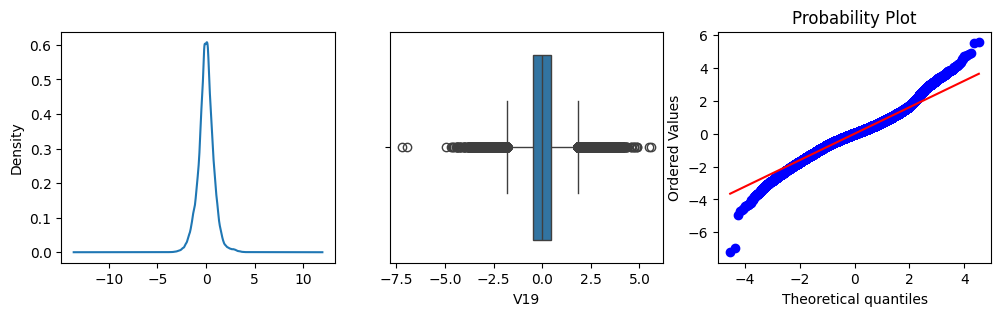

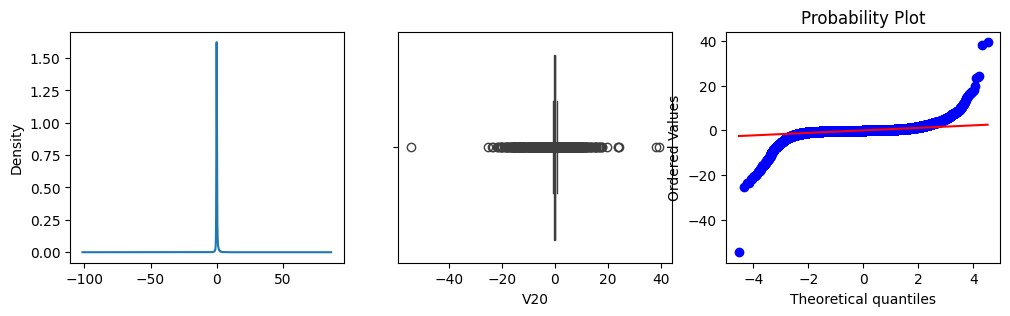

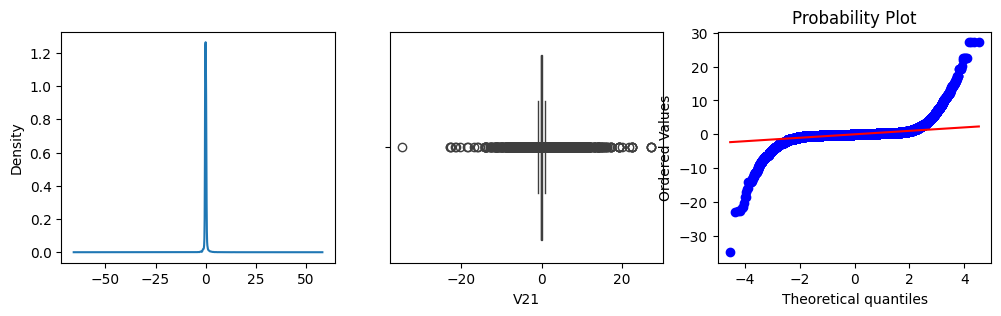

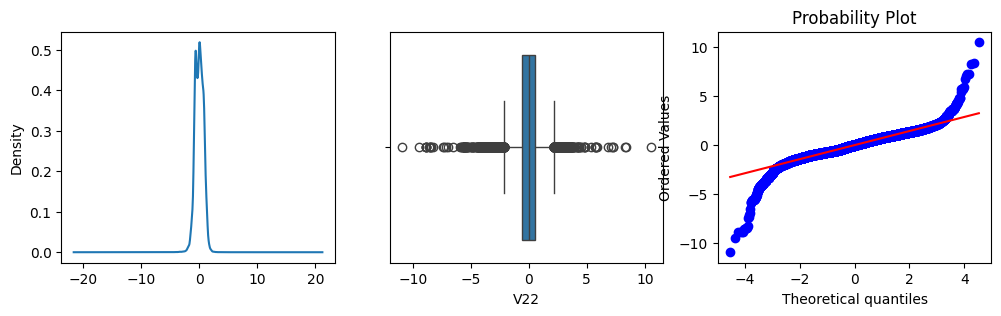

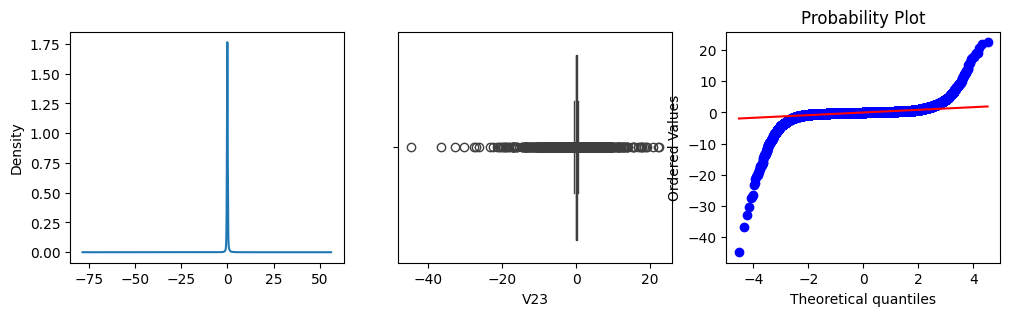

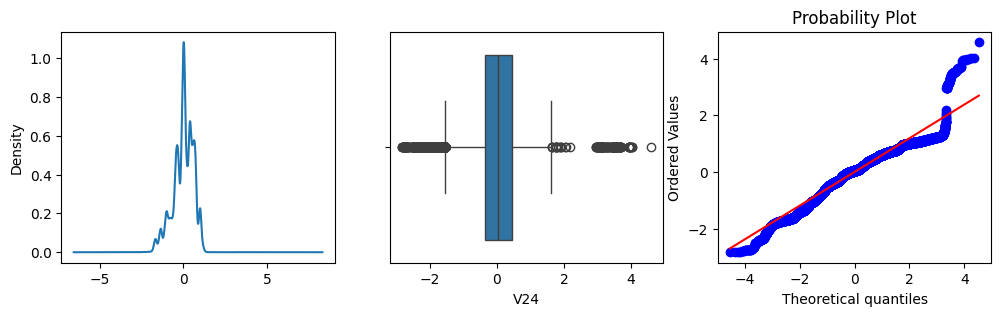

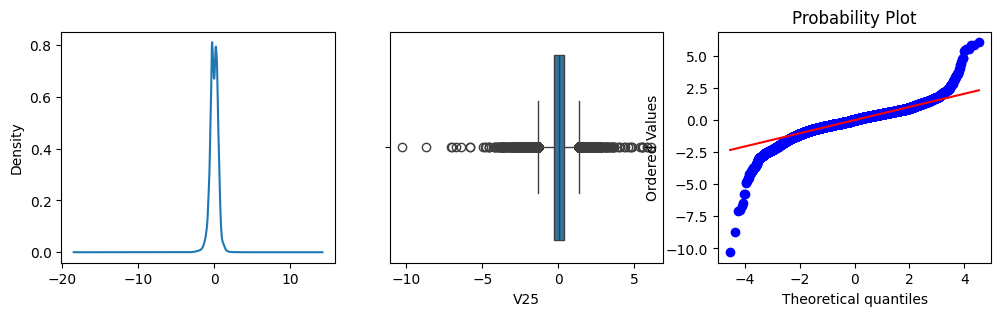

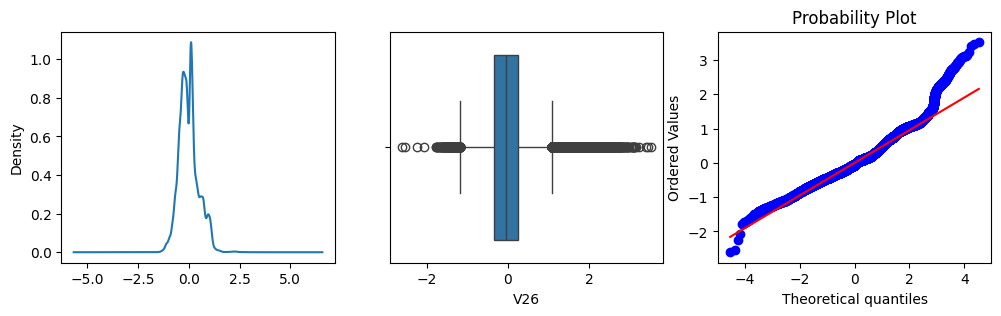

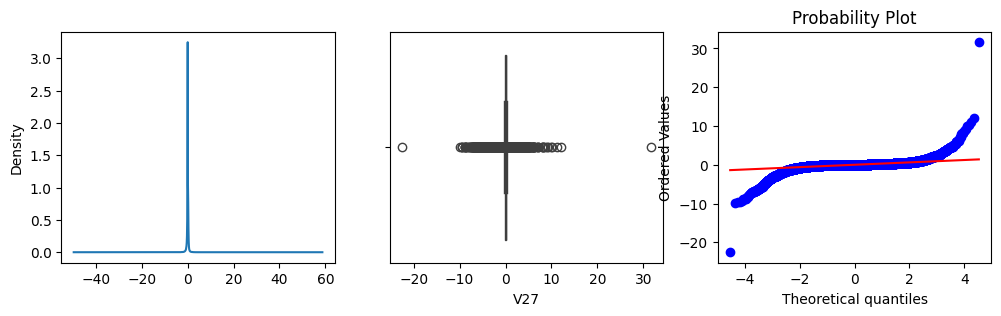

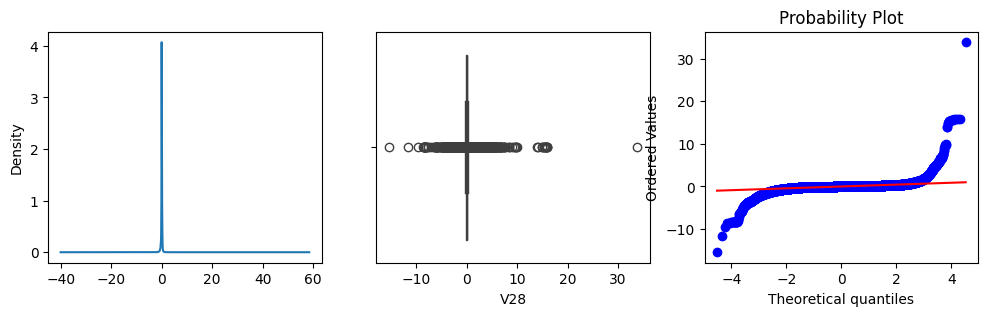

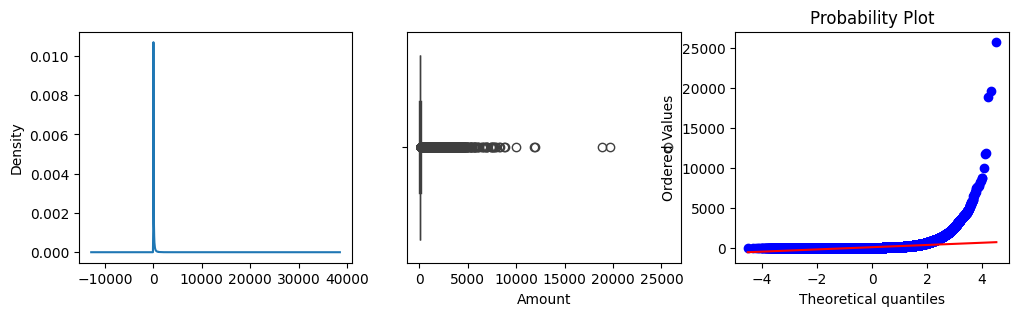

In [61]:
for i in X_train.columns:
  fun(X_train,i)

In [62]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [63]:
#trimming
def fun_1(df,var):
  iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
  upper=df[var].quantile(0.75)+1.5*iqr
  lower=df[var].quantile(0.25)-1.5*iqr
  return upper,lower
for i in X_train.columns:
  upper,lower=fun_1(X_train,i)
  X_train[i+'_trimming']=np.where(X_train[i]>upper,upper,np.where(X_train[i]<lower,lower,X_train[i]))

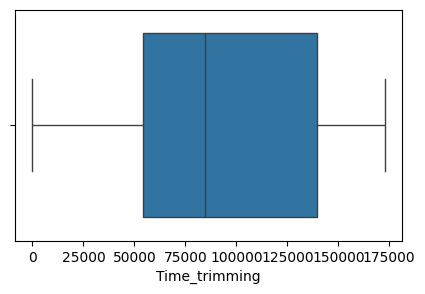

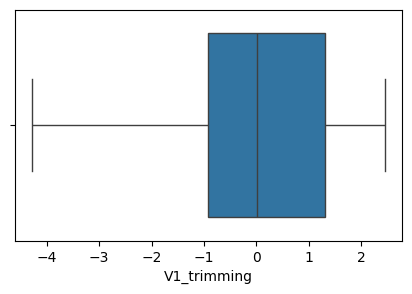

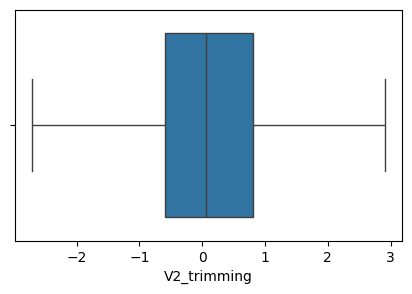

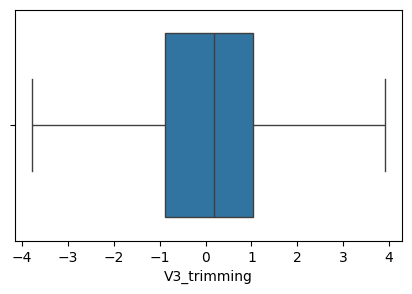

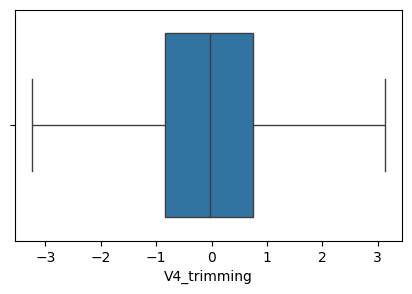

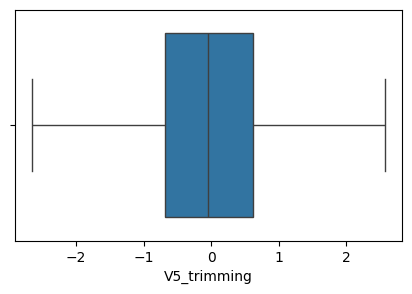

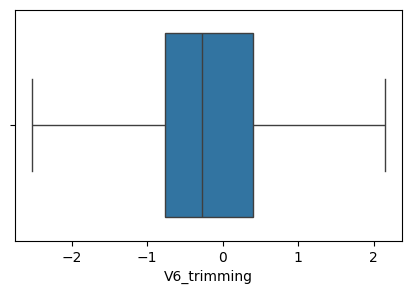

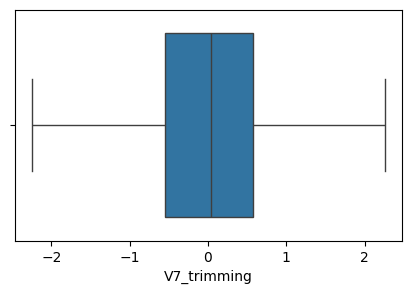

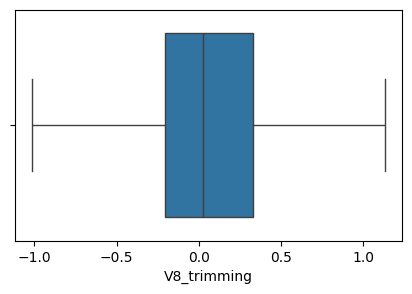

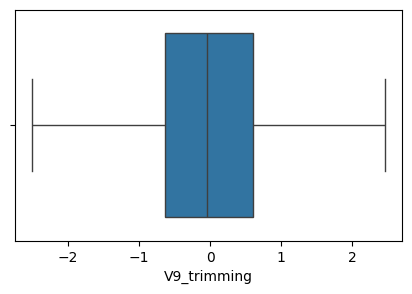

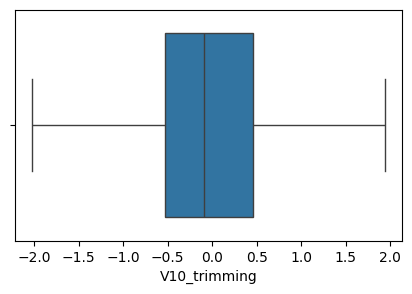

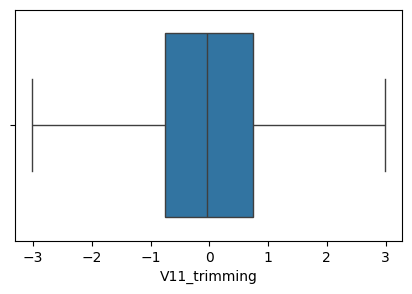

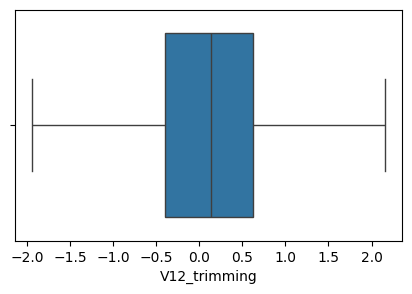

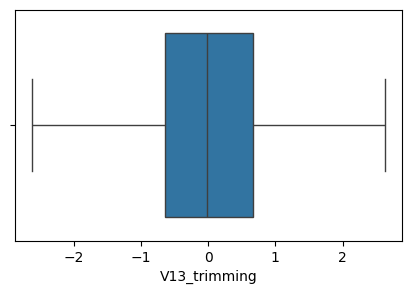

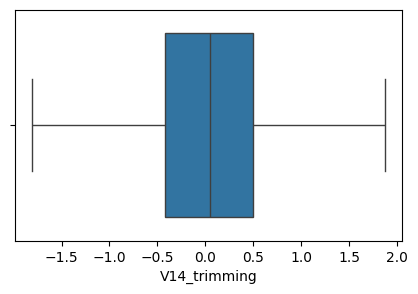

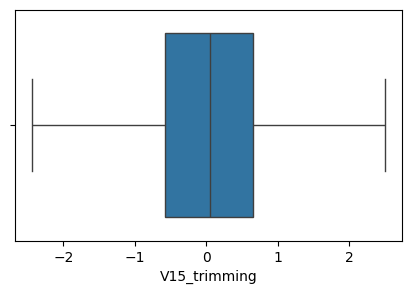

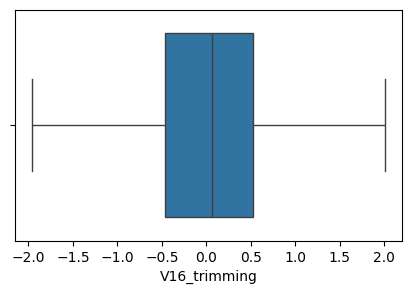

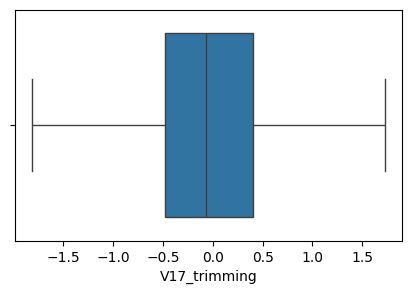

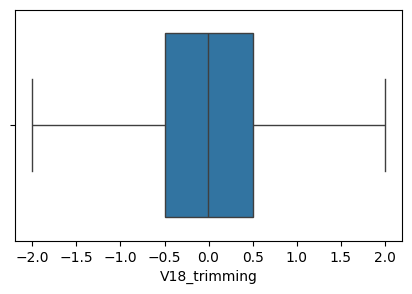

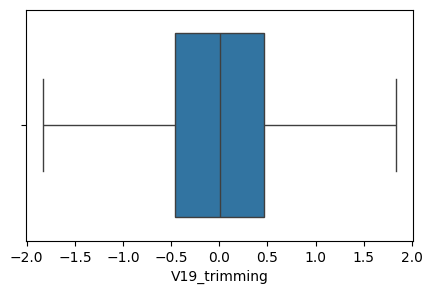

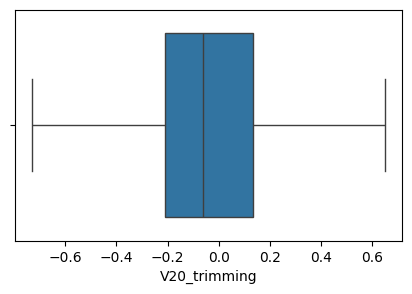

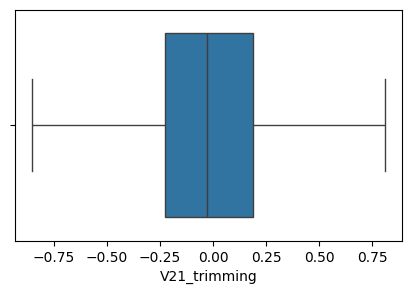

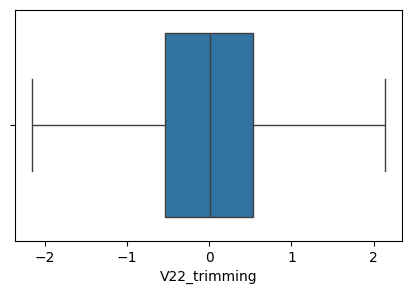

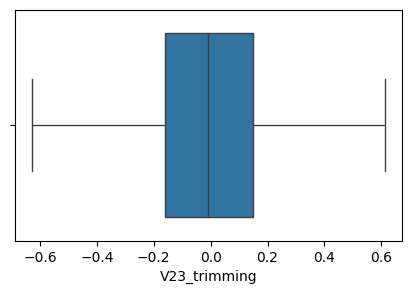

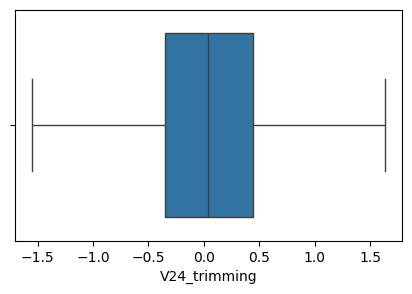

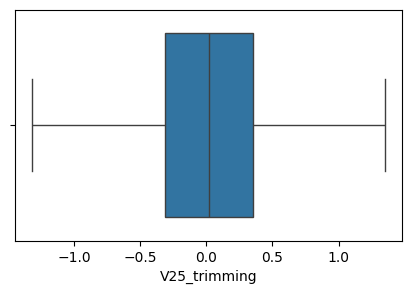

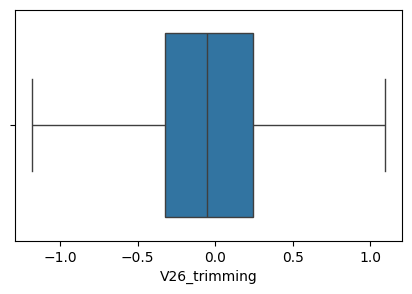

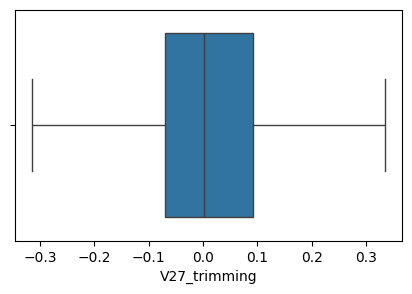

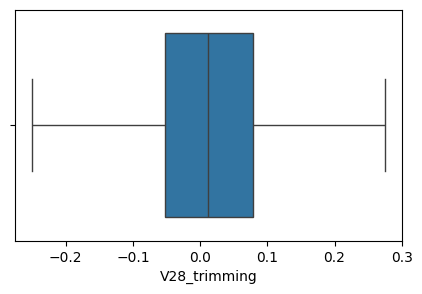

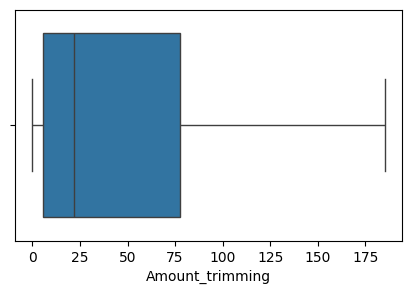

In [64]:
def box(df,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=df[var])
  plt.show()
for i in X_train.columns:
  if "_trimming" in i:
    box(X_train,i)

In [65]:
def fun_1(df,var):
  iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
  upper=df[var].quantile(0.75)+1.5*iqr
  lower=df[var].quantile(0.25)-1.5*iqr
  return upper,lower
for i in X_test.columns:
  upper,lower=fun_1(X_test,i)
  X_test[i+'_trimming']=np.where(X_test[i]>upper,upper,np.where(X_test[i]<lower,lower,X_test[i]))


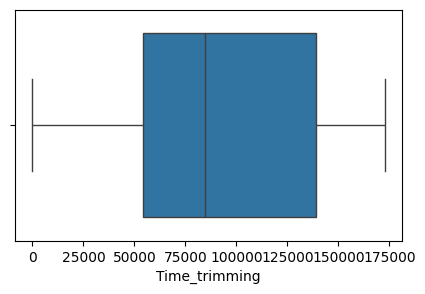

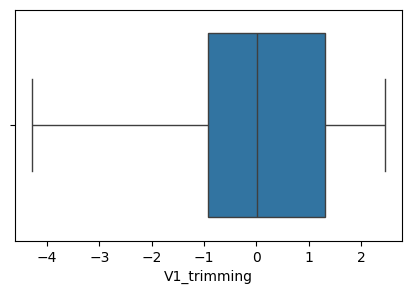

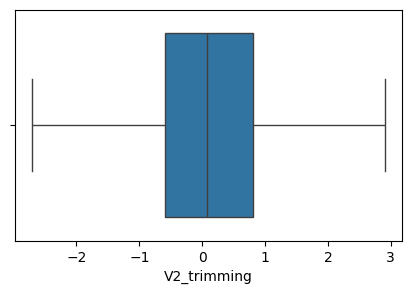

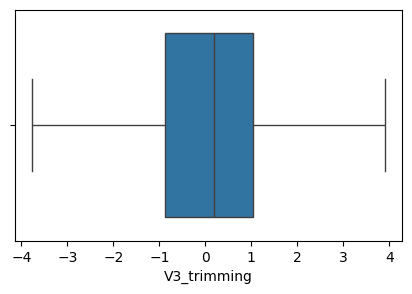

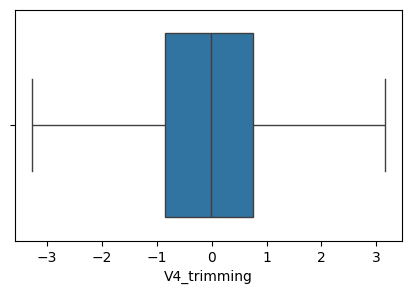

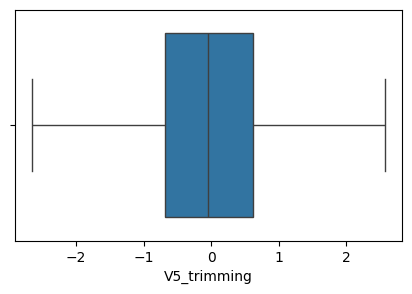

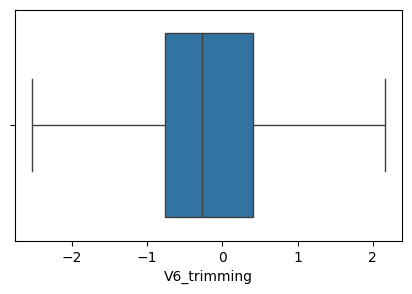

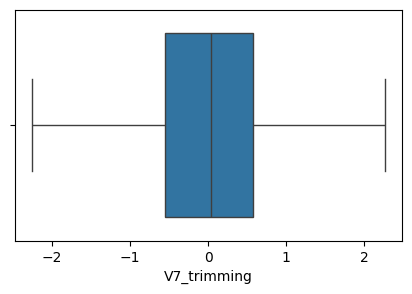

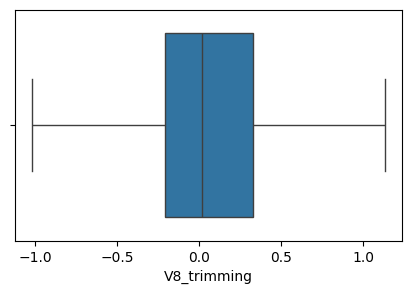

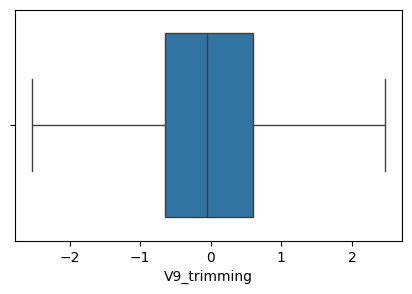

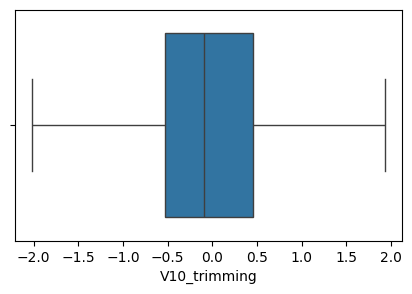

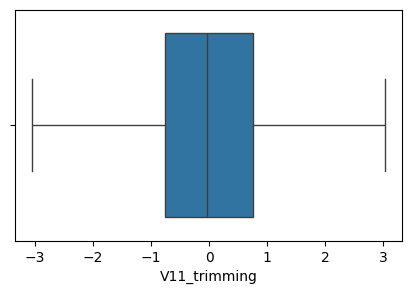

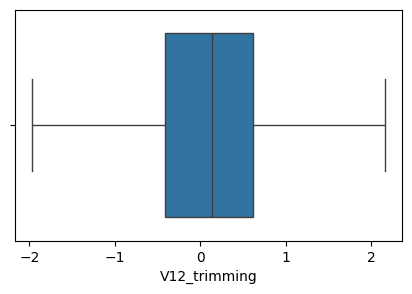

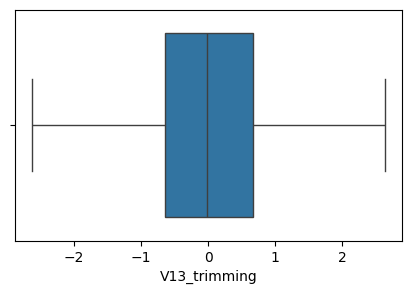

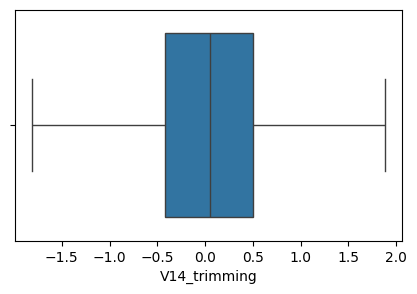

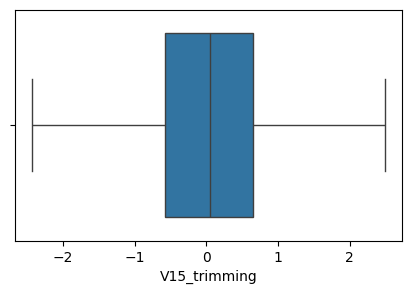

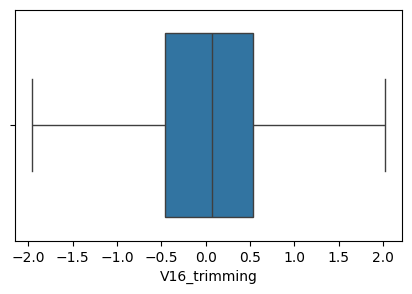

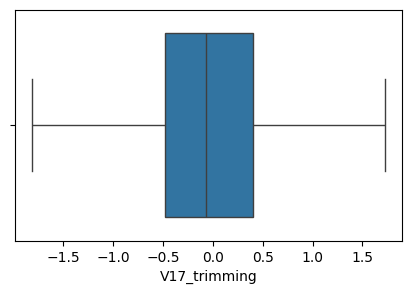

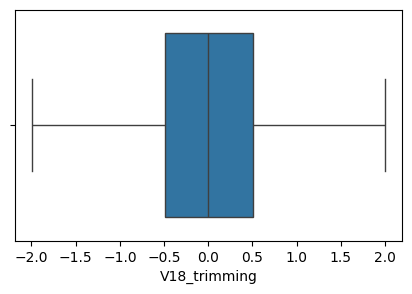

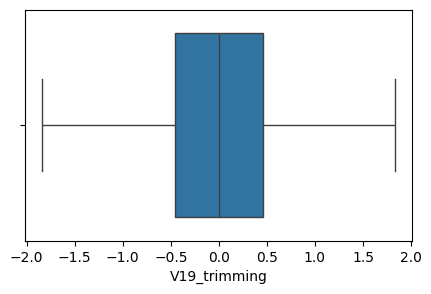

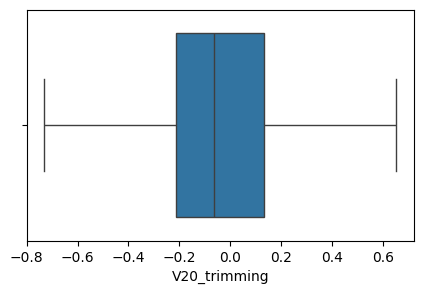

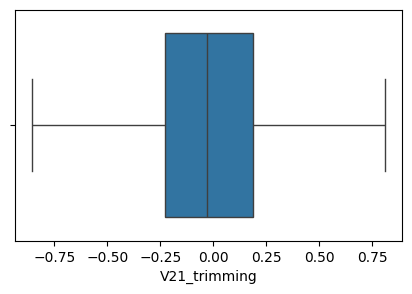

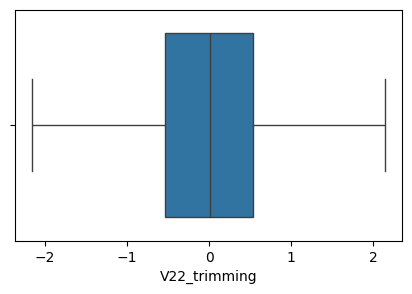

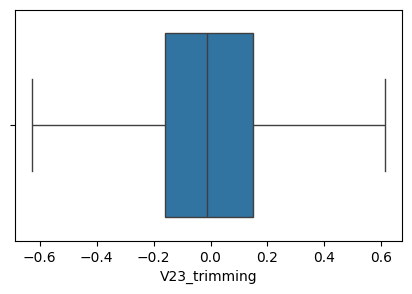

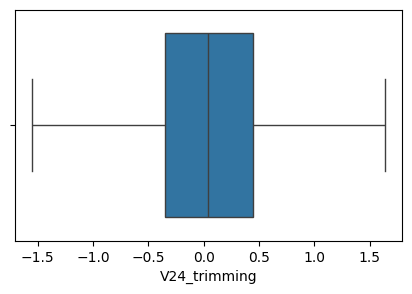

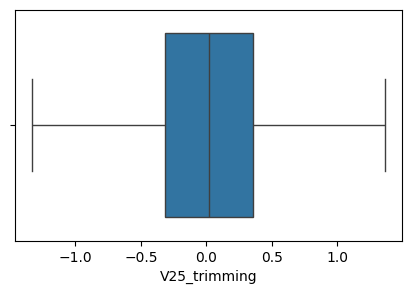

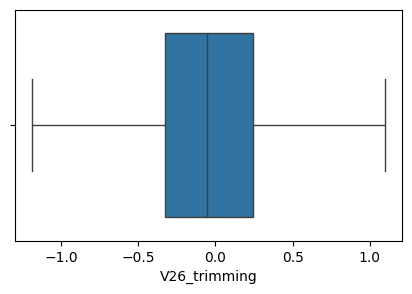

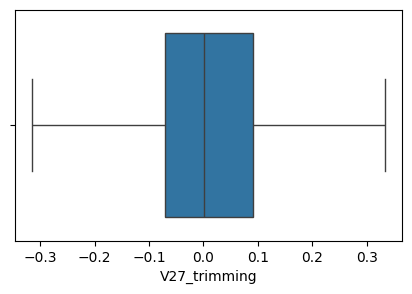

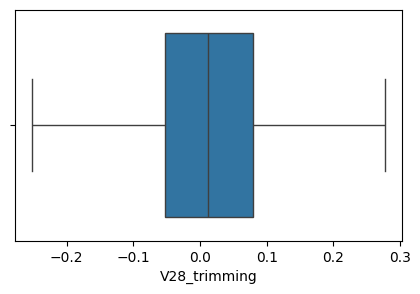

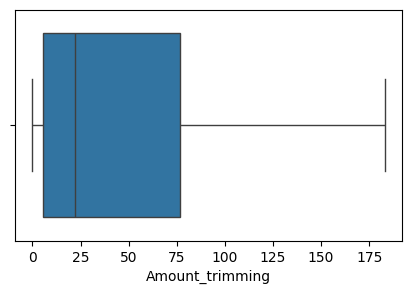

In [66]:
def box(df,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=df[var])
  plt.show()
for i in X_test.columns:
  if "_trimming" in i:
    box(X_test,i)

In [67]:
X_test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [68]:
X_train.drop(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],axis=1,inplace=True)

In [69]:
X_test.drop(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],axis=1,inplace=True)

In [70]:
X_train.columns

Index(['Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [71]:
# variance =0 drop feature
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [72]:
sum(var_thres.get_support())

np.int64(30)

In [73]:
X_train.columns[var_thres.get_support()]

Index(['Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [74]:
# variance =0 drop feature
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train)


VarianceThreshold(threshold=0.01)

In [75]:
sum(var_thres.get_support())

np.int64(30)

In [76]:
X_train.columns[var_thres.get_support()]

Index(['Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [77]:
X_train.head()

,Time_trimming,V1_trimming,V2_trimming,V3_trimming,V4_trimming,V5_trimming,V6_trimming,V7_trimming,V8_trimming,V9_trimming,...,V20_trimming,V21_trimming,V22_trimming,V23_trimming,V24_trimming,V25_trimming,V26_trimming,V27_trimming,V28_trimming,Amount_trimming
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,2.146657,-1.479661,1.131319,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.566298,2.146657,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-1.011334,0.000772,...,0.649232,-0.850172,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.231199,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [78]:
co=[]
for i in X_train:
  s=pearsonr(X_train[i],Y_train)
  co.append(s)
co=np.array(co)


In [79]:
p_value=pd.Series(co[:,1],index=X_train.columns)
p_value

,0
Time_trimming,4.596792e-07
V1_trimming,3.497287e-160
V2_trimming,2.214318e-229
V3_trimming,0.000000e+00
V4_trimming,0.000000e+00
V5_trimming,7.690539e-84
V6_trimming,1.126805e-105
V7_trimming,3.170924e-250
V8_trimming,7.376920e-42
V9_trimming,6.264017e-209


In [80]:
k=[]
g=list(p_value)
for i in p_value:
  if i>0.05:
    k.append(g.index(i))
k


[22, 23, 25, 26]

In [81]:
for i in range(len(X_train.columns)):
  if i in k:
    print(X_train.columns[i])

V22_trimming
V23_trimming
V25_trimming
V26_trimming


In [82]:
X_train.drop(['V22_trimming','V23_trimming','V25_trimming'],axis=1,inplace=True)

In [83]:
X_test.drop(['V22_trimming','V23_trimming','V25_trimming'],axis=1,inplace=True)

In [84]:
sm=SMOTE(random_state=42)
X_train,Y_train=sm.fit_resample(X_train,Y_train)

In [85]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [86]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [87]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)


DecisionTreeClassifier()

In [88]:
rf=RandomForestClassifier(class_weight="balanced",random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [89]:
print("KNN: ",classification_report(Y_test,knn.predict(X_test)))
print("DT: ",classification_report(Y_test,dt.predict(X_test)))
print("RF: ",classification_report(Y_test,rf.predict(X_test)))
print("LR: ",classification_report(Y_test,lr.predict(X_test)))

KNN:                precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.01      0.46      0.02        98

    accuracy                           0.91     56962
   macro avg       0.50      0.68      0.48     56962
weighted avg       1.00      0.91      0.95     56962

DT:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.78      0.38        98

    accuracy                           1.00     56962
   macro avg       0.63      0.89      0.69     56962
weighted avg       1.00      1.00      1.00     56962

RF:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.80      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

LR:

In [90]:
print("CONFUSION MATRIX FOR KNN: ",confusion_matrix(Y_test,knn.predict(X_test)))
print("CONFUSION MATRIX FOR DT: ",confusion_matrix(Y_test,dt.predict(X_test)))
print("CONFUSION MATRIX FOR RF: ",confusion_matrix(Y_test,rf.predict(X_test)))
print("CONFUSION MATRIX FOR LR: ",confusion_matrix(Y_test,lr.predict(X_test)))

CONFUSION MATRIX FOR KNN:  [[51536  5328]
 [   53    45]]
CONFUSION MATRIX FOR DT:  [[56641   223]
 [   22    76]]
CONFUSION MATRIX FOR RF:  [[56848    16]
 [   20    78]]
CONFUSION MATRIX FOR RF:  [[55282  1582]
 [    9    89]]


In [91]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

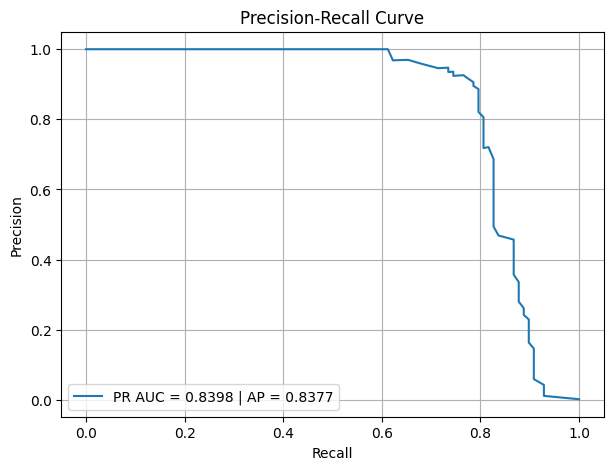

Precision-Recall AUC: 0.8398
Average Precision Score: 0.8377


In [92]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# Assuming you already have y_test (true labels) and y_pred_proba (model probabilities for class 1)
# If you only have predicted labels, replace with model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_proba)
pr_auc = auc(recall, precision)  # Area under the curve
avg_precision = average_precision_score(Y_test, y_pred_proba)  # More robust than auc sometimes

# Plot Precision-Recall curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f} | AP = {avg_precision:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
